# Research Question: 

Of the factors like GDP, average income, number of private and public universities, etc. that can impact the number of completed bachelors in a country per year, which factors have more impact on the number of people who have completed their tertiary education in OECD countries?

In this assignment, we will observe the number of people in OECD countries that complete their tertiary education. Tertiary education includes bachelor's and other kinds of higher levels of education. Factors like the country's GDP, GDP per capita, average family income, average tuition, the population of the country, how much the country spends on education, the number of public/private universities, and primary, secondary, and tertiary enrollment rates. are all included as variables in this model. We will train a multivariate regression to see if we can reliably predict the number of people graduating with their Bachelor's. We will also look to see which combinations of factors minimize the residual and thus have a greater impact/correlation on the number of Bachelor's degrees obtained. 

To provide some background, OECD stands for Organization for Economic Cooperation and Development and is a group of countries with market-based economies that collaborate to promote sustainable economic growth. We chose countries that are part of the OECD to evaluate because they account for three-fifths of the world's GDP, and all have similar economic infrastructure and is more extensive than countries that don’t participate in in OECD. Most non-OECD countries are countries with developing economies or modernizing economies. Because of these similarities in its economic infrastructure, we decided that this group of countries would be easier to evaluate compared to attaining data from all 197 countries in the world.

(Source: https://www.state.gov/the-organization-for-economic-co-operation-and-development-oecd/#:~:text=and%20Development%20(OECD)-,The%20Organization%20for%20Economic%20Cooperation%20and%20Development%20(OECD),to%20promote%20sustainable%20economic%20growth.)

https://www.state.gov/the-organization-for-economic-co-operation-and-development-oecd/#:~:text=and%20Development%20(OECD)-,The%20Organization%20for%20Economic%20Cooperation%20and%20Development%20(OECD),to%20promote%20sustainable%20economic%20growth.


In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import duckdb 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Data Collection/Cleaning: 

### GDP

https://data.oecd.org/gdp/gross-domestic-product-gdp.htm

This data set shows the nominal Gross Domestic Product (GDP) per capita of OEPD countries in US dollars from 1960 to 2022. The GDP is the standard measure of the value added created through the production of goods and services in a country during a certain period. The GDP per capita can be found by dividing the total GDP by its population. It also measures the income earned from that population, the total amount spent on final goods and services.
This data set was created to be a part of a larger data set called the OECD Economic Outlook created by the OECD Economics Department. 

The original data set has 8 columns: Location, Indicator, Subject, Measure, Frequency, Time, Value, Flag Codes). The Location column specifies the country. The Indicator column specifies what is being measured, which is GDP. This column would be helpful when accessing the larger data set, however, in this situation, since we are only accessing the GDP data set, this column is not necessary. The Subject column indicates the topic to which the data values in each row correspond to. In this dataset, since there is only one topic, the only value for this column is “Total GDP”. The Measure column specifies how the data was measured. In this case, the data was measured in US dollars/capita. The Frequency column is similar to the measure column and is used to filter out this specific data set from the larger data set. The Time column indicates what year each data value is from. The time ranges from the years 1960 to 2022. The Value column displays the nominal GDP per capita. The last column, Flag Codes, is used to indicate an error for each row. 

The columns: Indicator, Subject, Measure, Frequency, and Flag Codes are not necessary because all the values are the same. They do not provide any significant information. 

From the original data set, we removed the Indicator, Subject, Measure, Frequency, and Flag Codes columns. We also renamed the "Location" column as "Country" and the "Time" column as "Year" in order to be consistent with the previous data sets. We also renamed the "Value" column as "GDP in US Dollars".
We also need to limit the years to be between the years 1995 to 2020 in order to be consistent with the previous data sets found and limit the amount of missing values in the data.

In [169]:
gdp_df = pd.read_csv('gdp.csv')
query = """
        SELECT 
            LOCATION AS Country,
            TIME AS Year,
            Value AS "GDP per Capita"
        FROM gdp_df
        """
gdp_df = duckdb.sql(query).df()
gdp_df

,Country,Year,GDP per Capita
0,AUS,1960,2412.627589
1,AUS,1961,2383.188902
2,AUS,1962,2577.332834
3,AUS,1963,2752.620592
4,AUS,1964,2902.590472
...,...,...,...
1786,CRI,2018,21312.713380
1787,CRI,2019,22739.241909
1788,CRI,2020,21755.528069
1789,CRI,2021,22612.375289


In [170]:
gdp_df.to_csv('clean_gdp.csv', index=False)

In [171]:
combined_df = gdp_df
combined_df 

,Country,Year,GDP per Capita
0,AUS,1960,2412.627589
1,AUS,1961,2383.188902
2,AUS,1962,2577.332834
3,AUS,1963,2752.620592
4,AUS,1964,2902.590472
...,...,...,...
1786,CRI,2018,21312.713380
1787,CRI,2019,22739.241909
1788,CRI,2020,21755.528069
1789,CRI,2021,22612.375289


After doing this, we need to drop the Country_2 and Year_2 columns, because they are redundant, change all the float values in Year to be integers, and round the GDP values to two decimals to represent US dollars. 

In [172]:
#making the values in the Year column integers
combined_df['Year'] = combined_df['Year'].astype(int)

#rounding the GDP values to 2 decimals
combined_df['GDP per Capita'] = combined_df['GDP per Capita'].round(2)

combined_df

,Country,Year,GDP per Capita
0,AUS,1960,2412.63
1,AUS,1961,2383.19
2,AUS,1962,2577.33
3,AUS,1963,2752.62
4,AUS,1964,2902.59
...,...,...,...
1786,CRI,2018,21312.71
1787,CRI,2019,22739.24
1788,CRI,2020,21755.53
1789,CRI,2021,22612.38


### Population

https://data.oecd.org/pop/population.htm

This data set shows the total population per million of people from 1950 to 2022 in OECD countries. The total population count accounts for the following groups: national armed forces stationed abroad, merchant seamen at sea, diplomatic personnel located abroad, civilian aliens resident in the country, and displaced residents in the country. However, this total count excludes foreign armed forces stationed in the country, foreign diplomatic personnel located in the country, and civilian aliens temporarily in the country. 

This data set was created in part of the OECD Labour Force Statistics created by the ​​Committee of Statistics and Statistical Policy in order to provide reliable annual labor force statistics covering long time series for internal OECD users (in particular, the Economics Department), member country government agencies, and other external users in academic institutions and private enterprise.

The original data set has 8 columns: Location, Indicator, Subject, Measure, Frequency, Time, Value, Flag Codes). The Location specificies which Country. The Indicator column specifies what is being measured, which is population. This column would be helpful when accessing the larger data set (OECD Labour Force Statistics), however, in this situation, since we are only accessing the total population data set, this column is not necessary. The Subject column indicates the topic to which the data values in each row correspond to. In this dataset, since there is only one topic, the only value for this column is “Total Population”. The Measure column just specifies how the data was measured, in this case, the population per millions of people. The Frequency column is similar to the measure column and is used to filter out this specific data set from the larger data set. The Time Column indicates what year each statistics is from. The time ranges from the years 1950 to 2022. The Value column displays the total population for each country and year per millions of people. The last column, Flag Codes, is used to indicate an error for each row. 
The columns: Indicator, Subject, Measure, Frequency, and Flag Codes are not necessary because all the values are the same. They do not provide any significant information. 

From the original data set, we removed the Indicator, Subject, Measure, Frequency, and Flag Codes columns. We also renamed the "Location" column as "Country" and the "Time" column as "Year" in order to be consistent with the previous data sets. We also renamed the "Value" column as "Total Population (Millions of people)" in order to specify the value of it, which is needed when we combine all the data sets.

We also need to limit Years to be between 1995 to 2020 in order to be consistent with the previous data sets and limit the amount of missing values.


In [173]:
population_df = pd.read_csv('population.csv')
population_df

query = """
        SELECT 
            LOCATION AS Country,
            TIME AS Year,
            Value AS "Population(Million)"
        FROM population_df
        """
population_df = duckdb.sql(query).df()
population_df

,Country,Year,Population(Million)
0,AUS,1950,8.178700
1,AUS,1951,8.421700
2,AUS,1952,8.636500
3,AUS,1953,8.815300
4,AUS,1954,8.986500
...,...,...,...
2842,LTU,2018,2.801543
2843,LTU,2019,2.794137
2844,LTU,2020,2.794885
2845,LTU,2021,2.808380


In [174]:
population_df.to_csv('clean_population.csv', index=False)

The two dataframes (combined_df and population_df) are combined below using a left ioin, so that we will have a cohesive data frame showing enrollment rates, gdp, and total population of each country and year. By using the left join, it allows us to filter through the new data set we are looking to add to our dataset to reduce the number of NAs that may form when there are data for years that is not in our combined_df.

In [175]:
query = """
        SELECT *
        FROM combined_df
        LEFT JOIN population_df
        ON combined_df.Country = population_df.Country
        AND combined_df.Year = population_df.Year;
        """

combined_df = duckdb.sql(query).df()
combined_df 

,Country,Year,GDP per Capita,Country_2,Year_2,Population(Million)
0,AUS,1960,2412.63,AUS,1960,10.275000
1,AUS,1961,2383.19,AUS,1961,10.508200
2,AUS,1962,2577.33,AUS,1962,10.700500
3,AUS,1963,2752.62,AUS,1963,10.906900
4,AUS,1964,2902.59,AUS,1964,11.121600
...,...,...,...,...,...,...
1786,SVN,2022,48361.94,SVN,2022,2.108732
1787,LVA,2012,21297.47,LVA,2012,2.034324
1788,LVA,2014,23810.22,LVA,2014,1.993785
1789,PRT,1977,4136.35,PRT,1977,9.455673


In the table, above there are a lot of missing values. Some countries might not have enrollment rates for either early childhood education or higher education or gdp values and because of this a lot of Column values for Country, and Year are filled with Nan. To fix this, we have to make all the values in the Country and Country_2 column the same, and Year and Year_2 values the same. After doing this, we need to drop the Country_2 and Year_2 columns, because they are redundant and change all the float values in Year to be integers, 

In [176]:
# Fill missing values in Country with values from Country_2
combined_df['Country'] = combined_df['Country'].fillna(combined_df['Country_2'])

# Fill missing values in Country_2 with values from Country
combined_df['Country_2'] = combined_df['Country_2'].fillna(combined_df['Country'])

# Fill missing values in Year with values from Year_2
combined_df['Year'] = combined_df['Year'].fillna(combined_df['Year_2'])

# Fill missing values in Year_2 with values from Year
combined_df['Year_2'] = combined_df['Year_2'].fillna(combined_df['Year'])

#dropping Country_2 and Year_2 columns
combined_df = combined_df.drop(columns=['Country_2', 'Year_2'])

#making the values in the Year column integers
combined_df['Year'] = combined_df['Year'].astype(int)

combined_df

,Country,Year,GDP per Capita,Population(Million)
0,AUS,1960,2412.63,10.275000
1,AUS,1961,2383.19,10.508200
2,AUS,1962,2577.33,10.700500
3,AUS,1963,2752.62,10.906900
4,AUS,1964,2902.59,11.121600
...,...,...,...,...
1786,SVN,2022,48361.94,2.108732
1787,LVA,2012,21297.47,2.034324
1788,LVA,2014,23810.22,1.993785
1789,PRT,1977,4136.35,9.455673


### Education Spending on Higher Education 

https://data.oecd.org/eduresource/education-spending.htm#indicator-chart

This data set shows the average amount of spending on tertiary education that covers expenditure on schools, universities and other public and private educational institutions in 38 OECD countries. Spending includes instruction and ancillary services for students and families provided through educational institutions. Education spending is shown in USD per student.

This data set was created in part of a larger data set, Education at a Glance in order to provide descriptive information on the output of educational institutions; the impact of learning across countries; access, participation and progression in education; the financial resources invested in education; and teachers, the learning environment and the organisation of schools. This data was created with the intention to facilitate the dissemination and use of comparative education statistics that will contribute to policies that results in better functioning and more effective education systems. 

The original data set has 8 columns: Location, Indicator, Subject, Measure, Frequency, Time, Value, Flag Codes). The Location specificies which Country. The Indicator column specifies what is being measured, which is education expenses. This column would be helpful when accessing the larger data set (Education Spending), however, in this situation, since we are only accessing the total population data set, this column is not necessary. The Subject column indicates the topic to which the data values in each row correspond to. In this dataset, since there is only one topic, the only value for this column is “Tertiary”, meaning that is it not necessary to us. The Measure column just specifies how the data was measured, in this case, USD per student. The Frequency column is similar to the measure column and is used to filter out this specific data set from the larger data set. The Time Column indicates what year each statistic is from. The time ranges from the years 1995 to 2020. The Value column displays the average amount of money spent on tertiary education in US dollars per student. The last column, Flag Codes, is used to indicate an error for each row. 

The columns: Indicator, Subject, Measure, Frequency, and Flag Codes are not necessary because all the values are the same. They do not provide any significant information. 
From the original data set, we removed the Indicator, Subject, Measure, Frequency, and Flag Codes columns. We also renamed the "Location" column as "Country" and the "Time" column as "Year" in order to be consistent with the enrollment_rates_df. We also renamed the "Value" column as "Average Spending on Higher Education (USD/student)" in order to specify the value of it, which is needed when we combine all the data sets.

In [177]:
average_spending_df = pd.read_csv('education_spending.csv')

query = """
        SELECT 
            LOCATION AS Country,
            TIME AS Year,
            Value AS "Average Spending on Higher Education (USD/student)"
        FROM average_spending_df
        ORDER BY Year
        """
average_spending_df = duckdb.sql(query).df()
average_spending_df

,Country,Year,Average Spending on Higher Education (USD/student)
0,CZE,1995,7846.0600
1,HUN,1995,6369.8950
2,CHL,1995,4452.8050
3,FIN,1995,9831.3360
4,USA,1995,15696.5100
...,...,...,...
490,TUR,2020,9287.7930
491,COL,2020,4980.6108
492,LVA,2020,13043.3500
493,CRI,2020,15424.3000


In [178]:
average_spending_df.to_csv('clean_average_spending_df.csv', index=False)

In [179]:
query = """
        SELECT *
        FROM combined_df
        LEFT JOIN average_spending_df
        ON combined_df.Country = average_spending_df.Country
        AND combined_df.Year = average_spending_df.Year;
        """

combined_df = duckdb.sql(query).df()
combined_df 

,Country,Year,GDP per Capita,Population(Million),Country_2,Year_2,Average Spending on Higher Education (USD/student)
0,AUS,2000,28312.86,19.028802,AUS,2000.0,12500.200
1,AUS,2005,35659.13,20.176844,AUS,2005.0,14171.660
2,AUS,2008,40130.34,21.249199,AUS,2008.0,15768.220
3,AUS,2009,41672.92,21.691653,AUS,2009.0,16589.220
4,AUS,2010,42816.43,22.031750,AUS,2010.0,16300.980
...,...,...,...,...,...,...,...
1786,USA,2008,48498.45,304.093966,USA,2008.0,26949.290
1787,EST,2019,39068.37,1.326855,EST,2019.0,17243.690
1788,USA,2011,49951.91,311.583481,USA,2011.0,26202.940
1789,SVK,1995,8695.70,5.363676,SVK,1995.0,4851.865


In the table, above there are a lot of missing values. Some countries might not have enrollment rates for either early childhood education or higher education or gdp values, or etc. and because of this a lot of Column values for Country, and Year are filled with Nan. To fix this, we have to make all the values in the Country and Country_2 column the same, and Year and Year_2 values the same. After doing this, we need to drop the Country_2 and Year_2 columns, because they are redundant and change all the float values in Year to be integers.

In [180]:
#dropping Country_2 and Year_2 columns
combined_df = combined_df.drop(columns=['Country_2', 'Year_2'])

#making the values in the Year column integers
combined_df['Year'] = combined_df['Year'].astype(int)

combined_df

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student)
0,AUS,2000,28312.86,19.028802,12500.200
1,AUS,2005,35659.13,20.176844,14171.660
2,AUS,2008,40130.34,21.249199,15768.220
3,AUS,2009,41672.92,21.691653,16589.220
4,AUS,2010,42816.43,22.031750,16300.980
...,...,...,...,...,...
1786,USA,2008,48498.45,304.093966,26949.290
1787,EST,2019,39068.37,1.326855,17243.690
1788,USA,2011,49951.91,311.583481,26202.940
1789,SVK,1995,8695.70,5.363676,4851.865


### Expenditures on Education as a Percent of the GDP

https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?view=chart

This data set shows government expenditures on education as a percentage of total GDP for all the countries in the world from 1980 - 2022.  Government expenditure on education (% of GDP) is calculated by dividing the total government expenditure for all levels of education (early, primary, secondary, tertiary, etc.) by the GDP and multiplying by 100. 
All the data is based on World Bank median estimates. The data on education was collected by the UNESCO Institute for Statistics from official responses to its annual education survey. All the data are mapped to the International Standard Classification of Education (ISCED) to ensure the comparability of education programs at the international level. The current version was formally adopted by UNESCO Member States in 2011. GDP data come from the World Bank. 

In the original data set, each row represents an OECD country, each column reflects the school year for which the data was presented, and each value in the data frame represents the percentage of GDP the government spent on education. In some countries, the school year spans across two calendar years, so in these cases, the reference year refers to the year in which the school year ended. There was also no header for the Country column. 
In order to be consistent with the format of the previous data sets, we melted the data set, added the header for the Country column, and mapped all the country names to their corresponding country codes. We also need to limit Years to be between 1995 and 2020  to be consistent with the previous data sets and limit the amount of missing values.

Some government expenditure percentages might appear lower in some countries where the private sector (households) have a larger share in the total funding for education.


In [181]:
government_expenditure_df = pd.read_csv('total-government-expenditure-on-education-gdp.csv')

query = """
        SELECT 
            Code AS Country,
            Year,
            "Historical and more recent expenditure estimates" AS "Government Expenditure On Education (%)"
        FROM government_expenditure_df
        """
    
government_expenditure_df = duckdb.sql(query).df()
government_expenditure_df


,Country,Year,Government Expenditure On Education (%)
0,AFG,1971,1.16036
1,AFG,1972,1.11718
2,AFG,1973,1.42788
3,AFG,1975,1.30332
4,AFG,1979,1.73981
...,...,...,...
5174,ZWE,2014,6.13835
5175,ZWE,2015,5.81279
5176,ZWE,2016,5.47262
5177,ZWE,2017,5.81878


In [182]:
government_expenditure_df.to_csv('clean_gov_expenditures_df.csv', index=False)

In the table, above two columns for country name and year, so we need to drop the Country_2 and Year_2 columns, because they are redundant and change all the float values in Year to be integers.

In [183]:
query = """
        SELECT *
        FROM combined_df
        LEFT JOIN government_expenditure_df
        ON combined_df.Country = government_expenditure_df.Country
        AND combined_df.Year = government_expenditure_df.Year;
        """

combined_df = duckdb.sql(query).df()
combined_df.head()

#dropping Country_2 and Year_2 columns
combined_df = combined_df.drop(columns=['Country_2', 'Year_2'])

combined_df 

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%)
0,AUS,1960,2412.63,10.275000,NaN,1.40000
1,AUS,1978,8553.93,14.359255,NaN,5.99879
2,AUS,1979,9456.68,14.515729,NaN,5.88711
3,AUS,1980,10478.42,14.695356,NaN,5.64446
4,AUS,1982,11988.84,15.184247,NaN,5.47011
...,...,...,...,...,...,...
1786,USA,1973,6725.41,211.908788,NaN,NaN
1787,USA,1982,14399.35,231.664458,NaN,NaN
1788,USA,1990,23835.32,249.622814,NaN,NaN
1789,CHL,2021,28070.41,19.678363,NaN,NaN


### Expenditures on Tertiary Education as a Percent of the GDP

https://databank.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series#

This data show government expenditures on tertiary education as a percentage of GDP from **1960 to 2019**. Multiplying this with the GDP can provide insight as to the amount of money provided by the government per year per country. Similar to the previous factor of expenditures on education as a whole, this can help us analyze the impact of government support as people are working to complete a higher education on the amount of degrees awarded per year and country.

The orginal data set has all the countries and all the years since 1960. However, many of the entries are missing values. When downloaded, the countries column did not have a header; to ease manipulation of this data set, I renamed the first column header to "Country". 

Since the years are the headers of the columns, which can make it difficult to match enteries during queries to join two dataframes, the years are melted into one single column named "Year". 

In addition, since the other dataframes record countries as the capital abbreviations of each, to keep the country names consistant in preparation for the final merge into a dataframe, we mapped the country names to the abbreviations and modified the "Country" column.

In [184]:
gdpPerTertEdu_df = pd.read_csv("TertiaryGovExp%GDP.csv")
gdpPerTertEdu_df = gdpPerTertEdu_df.rename(columns ={" ": "Country"})

# Removing empty column and OECD Member Data
#gdpPerTertEdu_df = gdpPerTertEdu_df.drop(columns=['Unnamed: 11'])
#gdpPerTertEdu_df = gdpPerTertEdu_df.drop([27])

# Melting years into a single column
year_names = gdpPerTertEdu_df.columns[1:]
gdpPerTertEdu_df = gdpPerTertEdu_df.melt(id_vars = ["Country"],
                                     var_name = "Year",
                          value_vars = year_names,
                           value_name = "Government Spending Teritary (% GDP)")

When we were mapping the countries, we decided not to map the average of the OECD members because the different economic and political structure may skew the average data. Also, may of our other data did not contain this kind of value, therefore, to stay consistent, we decided to omit this. 

In [185]:
country_map = {"Australia":"AUS","Austria":"AUT","Belgium":"BEL",
            "Canada":"CAN", "Chile":"CHL", "Colombia":"COL",
            "Costa Rica":"CRI","Czechia":"CZE", 
            "Denmark":"DNK", "Estonia": "EST", 
            "Finland":"FIN", "France":"FRA", "Germany":"DEU", 
            "Greece":"GRC", "Hungary":"HUN", "Iceland":"ISL", 
            "Ireland":"IRL","Israel":"ISR", "Italy":"ITA", 
            "Japan":"JPN", "Korea, Rep.":"KOR", "Korea":"KOR", 
            "Latvia":"LVA", "Lithuania":"LTU", "Luxembourg":"LUX", 
            "Mexico":"MEX", "Netherlands":"NLD", "New Zealand":"NZL",
            "Norway":"NOR", "Poland":"POL", "Portugal":"PRT", 
            "Slovak Republic":"SVK","Slovenia":"SVN","Spain":"ESP",
            "Sweden":"SWE","Switzerland":"CHE", "Turkiye":"TUR",
            "United Kingdom":"GBR","United States":"USA"}

gdpPerTertEdu_df["Country"] = gdpPerTertEdu_df["Country"].map(country_map)
gdpPerTertEdu_df

# The last row is empty, thus it is necessary to drop it prior to merging it with combined_df
#gdpPerTertEdu_df = gdpPerTertEdu_df[:-1]
#gdpPerTertEdu_df.replace('..',np.NaN)

#Because we cannot use directly encoded Nan values in out Linear Regression model, we need to replace all these values
#with the mean values of the columns that contain the missing values
#imputer = imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#gdpPerTertEdu_df['Government Spending Teritary (% GDP)'] = imputer.fit_transform(gdpPerTertEdu_df['Government Spending Teritary (% GDP)'])


,Country,Year,Government Spending Teritary (% GDP)
0,AUS,1980,1.3
1,AUT,1980,0.7
2,BEL,1980,1.0
3,CAN,1980,1.9
4,CHL,1980,1.5
...,...,...,...
1629,CHE,2022,NaN
1630,TUR,2022,NaN
1631,GBR,2022,NaN
1632,USA,2022,NaN


In [186]:
gdpPerTertEdu_df.to_csv('clean_gdpPerTertEdu_df.csv', index=False)

In [187]:
query = """
        SELECT *
        FROM combined_df
        LEFT JOIN gdpPerTertEdu_df
        ON combined_df.Country = gdpPerTertEdu_df.Country
        AND combined_df.Year = gdpPerTertEdu_df.Year
        """

combined_df = duckdb.sql(query).df()

#dropping Country_2 and Year_2 columns
combined_df = combined_df.drop(columns=['Country_2', 'Year_2'])

combined_df

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% GDP)
0,AUS,1980,10478.42,14.695356,NaN,5.64446,1.3
1,AUS,1982,11988.84,15.184247,NaN,5.47011,1.2
2,AUS,1983,12781.13,15.393472,NaN,5.36276,1.7
3,AUS,1985,14514.11,15.788312,NaN,5.39562,1.7
4,AUS,1986,14983.69,16.018350,NaN,5.27071,1.7
...,...,...,...,...,...,...,...
1786,DNK,1992,19826.83,5.171370,NaN,NaN,NaN
1787,ISR,1996,21623.87,5.685100,NaN,NaN,NaN
1788,BEL,1997,23732.79,10.181246,NaN,NaN,NaN
1789,USA,2008,48498.45,304.093966,26949.29,NaN,NaN


### Household Income per Capita

https://data.oecd.org/hha/household-disposable-income.htm#indicator-chart

This data set shows the gross household disposable income per capita in 38 OECD countries. Household disposable income is available to households such as wages and salaries, income from self-employment and unincorporated enterprises, income from pensions and other social benefits, and income from financial investments. Gross means that depreciation costs are not subtracted and it also includes social transfers, such as health or education provided for free or at reduced prices by governments and not-for-profit organizations.

This data set was created in part of a larger data set, National Accounts of OECD Countries created by the ​​Committee of Statistics and Statistical Policy in order to on an internationally comparable basis, a timely update of annual national accounts data to internal and external users for analytical purposes.  It also provides a forum of international exchange on national accounts standards, in order to improve the relevance of SNA and enhance international comparability.

The original data set has 8 columns: Location, Indicator, Subject, Measure, Frequency, Time, Value, Flag Codes). The Location specificies which Country. The Indicator column specifies what is being measured, which is household disposable income. This column would be helpful when accessing the larger data set (National Accounts of OECD Countries), however, in this situation, since we are only accessing the total population data set, this column is not necessary. The Subject column indicates the topic to which the data values in each row correspond to. In this dataset, since there is only one topic, the only value for this column is “Gross Adjusted”. The Measure column just specifies how the data was measured, in this case, gross household income per capita. The Frequency column is similar to the measure column and is used to filter out this specific data set from the larger data set. The Time Column indicates what year each statistics is from. The time ranges from the years 1950 to 2022. The Value column displays the total population for each country and year per millions of people. The last column, Flag Codes, is used to indicate an error for each row. 

The columns: Indicator, Subject, Measure, Frequency, and Flag Codes are not necessary because all the values are the same. They do not provide any significant information. 

From the original data set, we removed the Indicator, Subject, Measure, Frequency, and Flag Codes columns. We also renamed the "Location" column as "Country" and the "Time" column as "Year" in order to be consistent with the other data frames. We also renamed the "Value" column as "Household Income per Capita" in order to specify the value of it, which is needed when we combine all the data sets.

We also need to limit Years to be in between 1995 to 2020 in order to be consistent with the previous data sets and limit the amount of missing values.

In [188]:
household_income_df = pd.read_csv('household_income.csv')

query = """
        SELECT 
            LOCATION AS Country,
            TIME AS Year,
            Value AS "Household Income per Capita"
        FROM household_income_df;
        """
household_income_df = duckdb.sql(query).df()
household_income_df

,Country,Year,Household Income per Capita
0,JPN,2007,24916.381131
1,JPN,2008,25393.938874
2,JPN,2009,25581.218842
3,JPN,2010,26402.021262
4,JPN,2011,27299.673602
...,...,...,...
506,CRI,2016,14675.888631
507,CRI,2017,16130.493739
508,CRI,2018,16619.155338
509,CRI,2019,17161.123623


In [189]:
household_income_df.to_csv('clean_household_income_df.csv', index=False)

The two dataframes (combined_df and household_income_df) are combined below using a Full Join, so that we will have a cohesive data frame showing enrollment rates, gdp, and total population, public spending as a percentage of GDP, private spending as a percentage of GDP, and household income per capita of each country from 2013-2020.

In [190]:
query = """
        SELECT *
        FROM combined_df
        LEFT JOIN household_income_df
        ON combined_df.Country = household_income_df.Country
        AND combined_df.Year = household_income_df.Year;
        """

combined_df = duckdb.sql(query).df()
combined_df 

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% GDP),Country_2,Year_2,Household Income per Capita
0,AUS,2007,39687.45,20.827622,NaN,4.656220,1.0,AUS,2007.0,29524.379108
1,AUS,2008,40130.34,21.249199,15768.22,4.632780,1.0,AUS,2008.0,31051.323158
2,AUS,2010,42816.43,22.031750,16300.98,5.543040,1.2,AUS,2010.0,32599.998578
3,AUS,2011,44440.58,22.340024,16382.44,5.069950,1.2,AUS,2011.0,33941.087440
4,AUS,2012,43884.64,22.733465,16002.71,4.867880,1.2,AUS,2012.0,33934.614031
...,...,...,...,...,...,...,...,...,...,...
1786,EST,2015,29222.75,1.314608,12905.99,5.144190,1.4,EST,2015.0,19321.329148
1787,ESP,2008,33242.25,45.983169,13075.95,4.528060,1.0,ESP,2008.0,23317.348626
1788,GBR,2017,46061.35,66.040229,28042.59,5.384990,1.4,GBR,2017.0,32417.628654
1789,USA,2011,49951.91,311.583481,26202.94,6.521565,NaN,USA,2011.0,42186.856901


In the table, above two columns for country name and year, so we need to drop the Country_2 and Year_2 columns, because they are redundant and change all the float values in Year to be integers.

In [191]:
#dropping Country_2 and Year_2 columns
combined_df = combined_df.drop(columns=['Country_2', 'Year_2'])

#making the values in the Year column integers
combined_df['Year'] = combined_df['Year'].astype(int)

combined_df

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% GDP),Household Income per Capita
0,AUS,2007,39687.45,20.827622,NaN,4.656220,1.0,29524.379108
1,AUS,2008,40130.34,21.249199,15768.22,4.632780,1.0,31051.323158
2,AUS,2010,42816.43,22.031750,16300.98,5.543040,1.2,32599.998578
3,AUS,2011,44440.58,22.340024,16382.44,5.069950,1.2,33941.087440
4,AUS,2012,43884.64,22.733465,16002.71,4.867880,1.2,33934.614031
...,...,...,...,...,...,...,...,...
1786,EST,2015,29222.75,1.314608,12905.99,5.144190,1.4,19321.329148
1787,ESP,2008,33242.25,45.983169,13075.95,4.528060,1.0,23317.348626
1788,GBR,2017,46061.35,66.040229,28042.59,5.384990,1.4,32417.628654
1789,USA,2011,49951.91,311.583481,26202.94,6.521565,NaN,42186.856901


### Number of Universities

While looking for the number of universities in each country, we came across this data set in Statistica: https://www.statista.com/statistics/918403/number-of-universities-worldwide-by-country/, However, we couldn’t figure out a way of downloading the entire csv, instead only the chart shows up, not the original data. This is when we realized that the people who made this chart got their information directly from this other website: https://www.webometrics.info/en/distribution_by_country

The "Webometrics Ranking of World Universities" is an initiative of the Cybermetrics Lab, a research group belonging to the Consejo Superior de Investigaciones Científicas (CSIC), the largest public research body in Spain. They created this dataset because they wanted to create a representative sample of all the universities in all countries and their rankings in the country for useful economic-related analysis. This organization collaborated with other institutions of the Spanish R&D system, and with social, economic, national or foreign agents.
The original data set has 7 columns: Country, Top 100, 101-500, 501, 1000, 1001-10000, and Total. The Country column lists all the countries in the world and each other category lists how many universities in each country fall in those rankings. 

For our use, we used the Country and the Total column because we didn’t need the rankings of the universities, but how many universities are in each country. However, because, we weren’t able to directly download the full data set, had to create our own csv in Excel by manually entering the data for the country codes of OECD and their corresponding number of universities. When manually entering the data, we also made sure to format it in a way that wecould directly use the data set without cleaning it. 

In [192]:
num_universities_df = pd.read_csv('number_of_universities.csv')
num_universities_df

,Country,Number of Universities
0,AUS,187
1,AUT,84
2,BEL,142
3,CAN,383
4,CHL,130
5,COL,299
6,CRI,68
7,CZE,64
8,DNK,81
9,EST,31


The two dataframes (combined_df and num_universities_df) are combined below using a Left Join, so that we will have a cohesive data frame showing enrollment rates, gdp, and total population, public spending as a percentage of GDP, private spending as a percentage of GDP, household income per capita, average spending for higher education per student, and number of universities for each country from 2013-2020.

In [193]:
combined_df = pd.merge(combined_df, num_universities_df, on='Country', how='left')

combined_df

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% GDP),Household Income per Capita,Number of Universities
0,AUS,2007,39687.45,20.827622,NaN,4.656220,1.0,29524.379108,187
1,AUS,2008,40130.34,21.249199,15768.22,4.632780,1.0,31051.323158,187
2,AUS,2010,42816.43,22.031750,16300.98,5.543040,1.2,32599.998578,187
3,AUS,2011,44440.58,22.340024,16382.44,5.069950,1.2,33941.087440,187
4,AUS,2012,43884.64,22.733465,16002.71,4.867880,1.2,33934.614031,187
...,...,...,...,...,...,...,...,...,...
1786,EST,2015,29222.75,1.314608,12905.99,5.144190,1.4,19321.329148,31
1787,ESP,2008,33242.25,45.983169,13075.95,4.528060,1.0,23317.348626,276
1788,GBR,2017,46061.35,66.040229,28042.59,5.384990,1.4,32417.628654,337
1789,USA,2011,49951.91,311.583481,26202.94,6.521565,NaN,42186.856901,3180


Since some of the rows above in the combined data frame, have values for OECD, which represents the averages across all the countries, we are going to drop those rows, since not all the data frames that we joined in this value.

### Education Enrollment Data

https://ourworldindata.org/global-education

This data set shows the gross rate at which people enter primary, secondary, and tertiary education. It was created to show how school enrollment around the world increased dramatically in the last century. This data set was created by Our World Data, which is a project of the Global Change Data Lab, which is a registered charity in England and Wales. 

This data set has 5 columns: Country, Year, and School enrollment, primary (% gross), School enrollment, secondary (% gross), and School enrollment, tertiary (% gross).

The Country column lists all the country codes for all the countries that have available data. For this assignment, we are limiting the list of countries to OECD countries, 38 total countries. The Year column lists all the years over which this data was collected from 1970 to 2020. However, in order to reduce the amount of missing data in our final data set, we are going to limit the range of years from 1995 to 2020. 

The rate of primary school enrollment is measured through administrative data and is defined as the number of children enrolled in primary school who belong to a certain age group that corresponds to primary schooling divided by the total population of that age group. Some percentages are greater than 100, because children may enter education late or repeat a year. The rate of enrollment in secondary education and tertiary education is also measured in a similar manner as the rate of enrollment in primary education. 


In [194]:
enrollment_rates_df = pd.read_csv('enrollment_completion_rates.csv')
enrollment_rates_df.head()

,Entity,Code,Year,"Primary completion rate, total (% of relevant age group)","Completion rate, upper secondary education, both sexes (%)","Completion rate, lower secondary education, both sexes (%)","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)"
0,Afghanistan,AFG,1974,16.65700,NaN,NaN,33.10830,10.91069,1.02260
1,Afghanistan,AFG,1977,17.88076,NaN,NaN,36.11149,13.13156,1.40822
2,Afghanistan,AFG,1978,19.65284,NaN,NaN,37.63702,13.82176,1.80833
3,Afghanistan,AFG,1980,26.37324,NaN,NaN,44.13337,16.76427,NaN
4,Afghanistan,AFG,1981,32.70612,NaN,NaN,47.71170,19.32814,NaN


Here, we are selecting the columns we will be using, which is the country abbreviation, year, and enrollment rates.

In [195]:
query = """
        SELECT
            Code AS Country,
            Year,
            "School enrollment, primary (% gross)" AS "Primary Enrollment rate (% gross)",
            "School enrollment, secondary (% gross)" AS "Secondary Enrollment rate (% gross)",
            "School enrollment, tertiary (% gross)" AS "Tertiary Enrollment rate (% gross)"
        FROM enrollment_rates_df
        """

enrollment_rates_df = duckdb.sql(query).df()

In [196]:
enrollment_rates_df.head()

,Country,Year,Primary Enrollment rate (% gross),Secondary Enrollment rate (% gross),Tertiary Enrollment rate (% gross)
0,AFG,1974,33.10830,10.91069,1.02260
1,AFG,1977,36.11149,13.13156,1.40822
2,AFG,1978,37.63702,13.82176,1.80833
3,AFG,1980,44.13337,16.76427,NaN
4,AFG,1981,47.71170,19.32814,NaN


In [197]:
enrollment_rates_df.to_csv('clean_enrollment_rates_df.csv', index=False)

Using left join and mapping the year and country, we can filter out all countries that are not OECD countries, since all OECD countries would already be in the combined_df dataframe. 

In [198]:
query = """
        SELECT *
        FROM combined_df
        LEFT JOIN enrollment_rates_df
        ON combined_df.Country = enrollment_rates_df.Country
        AND combined_df.Year = enrollment_rates_df.Year
        ORDER BY combined_df.Country, combined_df.Year;
        """

combined_df = duckdb.sql(query).df()
combined_df.head()

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% GDP),Household Income per Capita,Number of Universities,Country_2,Year_2,Primary Enrollment rate (% gross),Secondary Enrollment rate (% gross),Tertiary Enrollment rate (% gross)
0,AUS,1960,2412.63,10.2750,NaN,1.4,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN
1,AUS,1961,2383.19,10.5082,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN
2,AUS,1962,2577.33,10.7005,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN
3,AUS,1963,2752.62,10.9069,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN
4,AUS,1964,2902.59,11.1216,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN


In the table, above two columns for country name and year, so we need to drop the Country_2 and Year_2 columns, because they are redundant and change all the float values in Year to be integers.

In [199]:
#dropping Country_2 and Year_2 columns
combined_df = combined_df.drop(columns=['Country_2', 'Year_2'])

#making the values in the Year column integers
combined_df['Year'] = combined_df['Year'].astype(int)
combined_df

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% GDP),Household Income per Capita,Number of Universities,Primary Enrollment rate (% gross),Secondary Enrollment rate (% gross),Tertiary Enrollment rate (% gross)
0,AUS,1960,2412.63,10.275000,NaN,1.40000,NaN,NaN,187,NaN,NaN,NaN
1,AUS,1961,2383.19,10.508200,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN
2,AUS,1962,2577.33,10.700500,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN
3,AUS,1963,2752.62,10.906900,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN
4,AUS,1964,2902.59,11.121600,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1786,USA,2018,62449.61,326.838199,34035.54,4.91233,NaN,52451.296797,3180,101.25656,99.27558,88.29918
1787,USA,2019,64690.27,328.329953,35346.91,4.98871,NaN,54747.164865,3180,100.98130,100.06343,87.88871
1788,USA,2020,63480.86,331.511512,36172.02,6.05000,NaN,58653.433345,3180,100.30579,100.50982,87.56766
1789,USA,2021,70181.12,332.031554,NaN,NaN,NaN,62334.169731,3180,NaN,NaN,NaN


### Student Teacher Ratio for Primary School

https://www.theglobaleconomy.com/rankings/student_teacher_ratio_primary_school/OECD/

**Description:** While looking for data, we came across this source that showed the student to teacher ratios from **1970 to 2019** for every country. This data set shows the student-to-teacher ratio in primary school from 1970 to 2019 for all OE. The student-to-teacher ratio is calculated by taking the average number of students per teacher in primary school. 

**Significance of Variable:** We think the student and teacher ratio in primary school will have an impact on the amount of bachelor's degrees awarded because it can provide a quantitative way of analyzing the quality of education. As student to teacher ratio increases, it may imply a lack of resources for students to develop a sturdy foundation.

However, when we tried to download the data set, they asked us to pay for the data set. Because we think that this information is vital to our research question, we decided to manually make a CSV, with information from this website. 

The Global Economy is a website that provides up-to-date numbers for GDP, inflation, credit, and other economic indicators. The data series they they make are updated continuously based on the release of this information from countries. They created this data set to servce researchers, academics, and investors who need reliable economic data on foreign countries. 

The original data set has 4 columns: Countries, Student-Teacher ratio, primary school, global rank, and available data. The Countries column lists all the OECD countries. The Student-Teacher ratio column displays the ratio of the average number of students per teacher in primary school in each country. The Global rank presents the global rank (rank 1 has the highest student-to-teacher ratio, while the last rank has the smallest student-to-teacher ratio).  The last column, available data shows what year data is available for each country. 

However, since we manually created a dataset, we only included the columns  “Country” and “Student-Teacher ratio, primary school”, and statistics from **1995 to 2020**. The global rank column isn’t significant to the research question that we are asking, and the available data column is also not necessary in our analysis.

In [200]:
#student_teacher_ratio_df = pd.read_csv('student_teacher_ratio.csv', encoding='latin-1')

### Population who have completed Tertiary Education:

https://data.oecd.org/eduatt/population-with-tertiary-education.htm

This data set shows the population with tertiary education, those who have completed the highest level of education by age group from **1981 to 2022**. Tertiary education includes bachelor's and higher levels of education. The measure is the percentage of the same-age population.

This data set was created in part of a larger data set, Education at a Glance in order to provide descriptive information on the output of educational institutions; the impact of learning across countries; access, participation, and progression in education; the financial resources invested in education; and teachers, the learning environment and the organization of schools. This data was created with the intention to facilitate the dissemination and use of comparative education statistics that will contribute to policies that result in better functioning and more effective education systems. 

The original data set has 8 columns: Location, Indicator, Subject, Measure, Frequency, Time, Value, Flag Codes). The Location specificies which Country. The Indicator column specifies what is being measured, which is tertiary education. This column would be helpful when accessing the larger data set (Education Spending), however, in this situation, since we are only accessing the total population data set, this column is not necessary. The Subject column indicates the topic to which the data values in each row correspond to. In this dataset, since there are multiple topics since all the data is split by different age groups (25-34 year-olds and 55-64 year-olds). The Measure column just specifies how the data was measured, in this case, a ratio of full-time students to teachers. The Frequency column is similar to the measure column and is used to filter out this specific data set from the larger data set. The Time Column indicates what year each statistic is from. The time ranges from the years 2013 to 2020. The Value column displays the ratio of students enrolled to teachers. The last column, Flag Codes, is used to indicate an error for each row. 

The columns: Indicator, Measure, Frequency, and Flag Codes are not necessary because all the values are the same. They do not provide any significant information. 
From the original data set, we removed the Indicator, Measure, Frequency, and Flag Codes columns. We also renamed the "Location" column as "Country" and the "Time" column as "Year" in order to be consistent with the enrollment_rates_df. We also renamed the "Value" column as "Population with Tertiary Education(%)" in order to specify the value of it, which is needed when we combine all the data sets.

We also need to limit Years to be between 1995 and 2020 in order to be consistent with the previous data sets and limit the amount of missing values. And limit the Subject column so the data only includes data from the agre group 25-34 year olds so we limit the amount of people we are double counting.

In [201]:
completed_tertiary_edu_df = pd.read_csv('completed_tertiary_edu.csv')

query = """
        SELECT 
            LOCATION AS Country,
            TIME AS Year,
            Value AS "Population with Tertiary Education (%)",
            SUBJECT
        FROM completed_tertiary_edu_df
        WHERE SUBJECT = '25_34';
        """
completed_tertiary_edu_df = duckdb.sql(query).df()

#dropping the column "subject" since we dont need it anymore
query = """
        SELECT Country, Year, "Population with Tertiary Education (%)"
        FROM completed_tertiary_edu_df;
        """
completed_tertiary_edu_df = duckdb.sql(query).df()
completed_tertiary_edu_df

,Country,Year,Population with Tertiary Education (%)
0,AUS,1989,34.140335
1,AUS,1991,35.707539
2,AUS,1993,22.836517
3,AUS,1994,23.624947
4,AUS,1995,24.697142
...,...,...,...
989,CRI,2018,27.815552
990,CRI,2019,31.346508
991,CRI,2020,32.465542
992,CRI,2021,30.260878


In [202]:
completed_tertiary_edu_df.to_csv('clean_completed_tertiary_edu_df.csv', index=False)

In [203]:
query = """
        SELECT *
        FROM combined_df
        LEFT JOIN completed_tertiary_edu_df
        ON combined_df.Country = completed_tertiary_edu_df.Country
        AND combined_df.Year = completed_tertiary_edu_df.Year
        ORDER BY combined_df.Country,combined_df.Year;
        """

combined_df = duckdb.sql(query).df()
combined_df.head()

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% GDP),Household Income per Capita,Number of Universities,Primary Enrollment rate (% gross),Secondary Enrollment rate (% gross),Tertiary Enrollment rate (% gross),Country_2,Year_2,Population with Tertiary Education (%)
0,AUS,1960,2412.63,10.2750,NaN,1.4,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,1961,2383.19,10.5082,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,1962,2577.33,10.7005,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN,NaN
3,AUS,1963,2752.62,10.9069,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,1964,2902.59,11.1216,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
#dropping Country_2 and Year_2 columns
combined_df = combined_df.drop(columns=['Country_2', 'Year_2'])

#making the values in the Year column integers
combined_df['Year'] = combined_df['Year'].astype(int)

combined_df.head()

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% GDP),Household Income per Capita,Number of Universities,Primary Enrollment rate (% gross),Secondary Enrollment rate (% gross),Tertiary Enrollment rate (% gross),Population with Tertiary Education (%)
0,AUS,1960,2412.63,10.2750,NaN,1.4,NaN,NaN,187,NaN,NaN,NaN,NaN
1,AUS,1961,2383.19,10.5082,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN
2,AUS,1962,2577.33,10.7005,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN
3,AUS,1963,2752.62,10.9069,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN
4,AUS,1964,2902.59,11.1216,NaN,NaN,NaN,NaN,187,NaN,NaN,NaN,NaN


When we were combining dataframes and adding different x variables that we want, we did left joins using the combined_df. This acheives our goal of only selecting OECD countries because the firsst dataframe, GDP, only contains information about OECD countries. However, we did not implement any limitations on year because we want to see the completeness of the final dataframe before we limit the year to prevent losing useful data. Looking at the data description of all our individual dataframes, we decided it would be best to limit the year range of our research to 1995 to 2019. 

In [205]:
# Updates combined_df after filtering the year
query = """
        SELECT *
        FROM combined_df
        WHERE (Year >= 1995) AND (Year < 2020)
        """

combined_df = duckdb.sql(query).df()

combined_df.head()

,Country,Year,GDP per Capita,Population(Million),Average Spending on Higher Education (USD/student),Government Expenditure On Education (%),Government Spending Teritary (% GDP),Household Income per Capita,Number of Universities,Primary Enrollment rate (% gross),Secondary Enrollment rate (% gross),Tertiary Enrollment rate (% gross),Population with Tertiary Education (%)
0,AUS,1995,22442.32,18.004882,NaN,5.13413,1.4,NaN,187,101.29127,143.23387,70.68857,24.697142
1,AUS,1996,23289.40,18.224767,NaN,5.23100,1.6,NaN,187,101.58029,148.63600,75.64778,NaN
2,AUS,1997,24477.41,18.423037,NaN,NaN,NaN,NaN,187,101.18403,152.93597,80.90665,25.702168
3,AUS,1998,25708.26,18.607584,NaN,NaN,NaN,NaN,187,100.92862,NaN,NaN,28.139578
4,AUS,1999,27139.25,18.812264,NaN,NaN,NaN,NaN,187,100.65884,NaN,NaN,28.981586


In [206]:
combined_df.to_csv('combined_data.csv', index=False)

## Exploratory Data Analysis

To help us better divide and analyze the data, we are going to create a new column that indicates the continent that the country is from.Using https://en.wikipedia.org/wiki/OECD, we grouped them based on geographic location. Since most countries are from Europe, we merged the Americas together and the Asia and Oceania countries together.

In [207]:
cont_map = {"AUS" : "OceaAsia","AUT":"Europe","BEL":"Europe",
            "CAN":"Americas", "CHL":"Americas", "COL":"Americas",
            "CRI":"Americas","CZE":"Europe", 
            "DNK":"Europe", "EST": "Europe", 
            "FIN":"Europe", "FRA":"Europe", "DEU":"Europe", 
            "GRC":"Europe", "HUN":"Europe", "ISL":"Europe", 
            "IRL":"Europe","ISR":"OceaAsia", "ITA":"Europe", 
            "JPN":"OceaAsia", "KOR":"OceaAsia", 
            "LVA":"Europe", "LTU":"Europe", "LUX":"Europe", 
            "MEX":"Americas", "NLD":"Europe", "NZL":"OceaAsia",
            "NOR":"Europe", "POL":"Europe", "PRT":"Europe", 
            "SVK":"Europe","SVN":"Europe","ESP":"Europe",
            "SWE":"Europe","CHE":"Europe", "TUR":"OceaAsia",
            "GBR":"Europe","USA":"Americas"}

combined_df["Geographic Location"] = combined_df["Country"].map(cont_map)
print (combined_df["Geographic Location"])

0      OceaAsia
1      OceaAsia
2      OceaAsia
3      OceaAsia
4      OceaAsia
         ...   
945    Americas
946    Americas
947    Americas
948    Americas
949    Americas
Name: Geographic Location, Length: 950, dtype: object


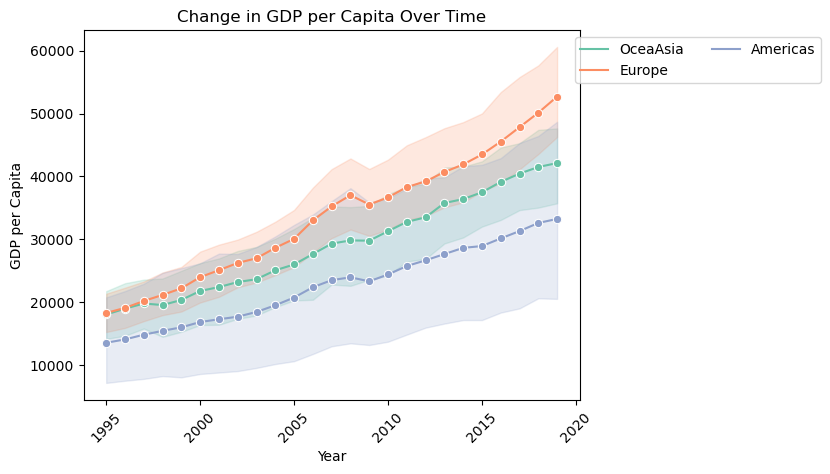

In [208]:
sns.lineplot(data = combined_df, x = "Year", y = "GDP per Capita", 
            hue = "Geographic Location", 
            marker = "o", palette = "Set2");
plt.legend(bbox_to_anchor = (1.5,1), loc = 'upper right', ncol = 2);
plt.xticks(rotation = 45);
#### Optional but nice to have a mapping to color each country based on
#### Continent
plt.title ("Change in GDP per Capita Over Time");

Using this graph, we can see a general linear increase in GDP per Capita. 

With the increasing trend, we would expect there to be a general increase in bachelor degrees, assuming all else is equal. Specifically, the countries in Europe seem to have a strong economy. However, this method of 

According to the WorldBank, GDP per captia is a measure of economic growth in that it measures the average value of output per person, which can indirectly provide information about the poverty situation and general income of the country. Knowing this can impact the amount of bachelor's degrees completed because the completion of bachelor programs may depend on whether families or individuals can afford to remain enrolled in the program.

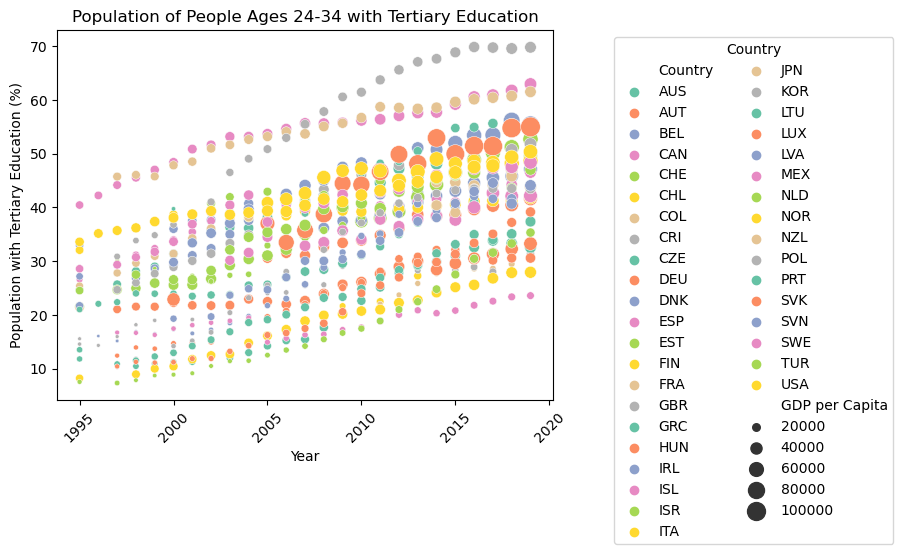

In [209]:
sns.scatterplot(data = combined_df, x = "Year", 
            y = "Population with Tertiary Education (%)", 
            hue = "Country", marker = "o", 
            palette = "Set2", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), loc = 'upper right', 
           ncol = 2, title = "Country");
plt.xticks(rotation = 45);
plt.title ("Population of People Ages 24-34 with Tertiary Education");

This graph shows the relationship between time, percent of population of ages 24-34 with a tertiary education, GDP per capita, and the country.

As mentioned in the previous observation about the relationship between GDP per capita and year, for most, if not all, the countries show a positive change in GDP per capita over time. This graph also shows this relationship, with the increase in time, there is a gradual increase in dot size, which is based on the GDP per capita. 

In addition, as countries approach a higher level of tertiary education for their population 

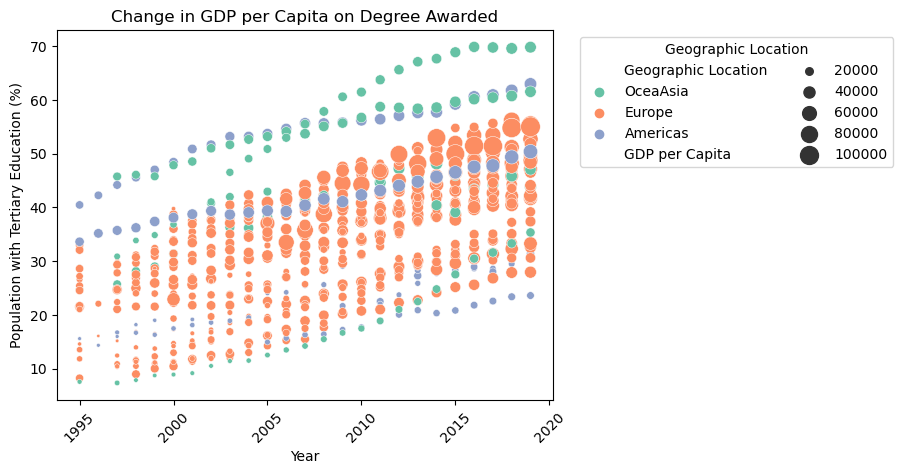

In [210]:
sns.scatterplot(data = combined_df, x = "Year", 
            y = "Population with Tertiary Education (%)", 
            hue = "Geographic Location", marker = "o", 
            palette = "Set2", size = "GDP per Capita", 
            sizes = (5, 200));

plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Geographic Location");
plt.xticks(rotation = 45);
plt.title ("Change in GDP per Capita on Degree Awarded");

As a general trend, countries with lower GDPs usually have a lower amount of degrees awarded. Although, year is not plotted here 

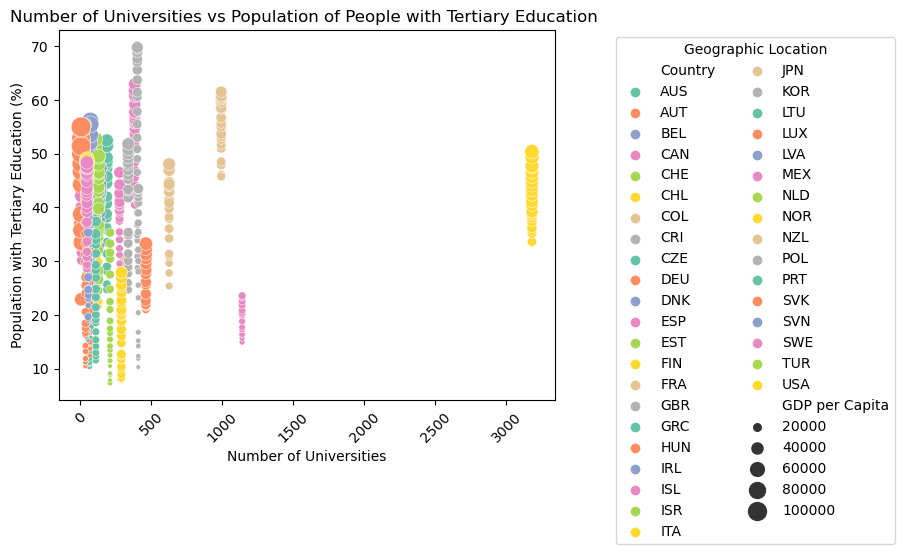

In [211]:
sns.scatterplot(data = combined_df, x = "Number of Universities", 
            y = "Population with Tertiary Education (%)", 
            hue = "Country", marker = "o", 
            palette = "Set2", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Geographic Location");
plt.xticks(rotation = 45);
plt.title ("Number of Universities vs Population of People with Tertiary Education ");

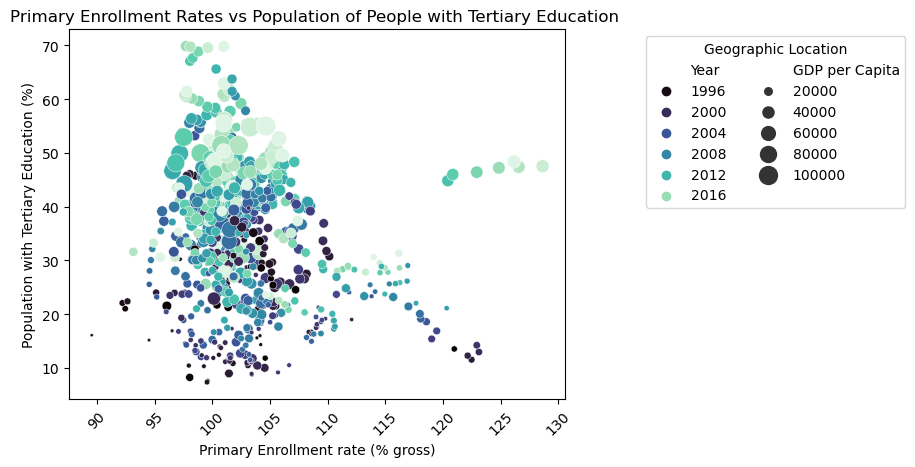

In [212]:
sns.scatterplot(data = combined_df, x = "Primary Enrollment rate (% gross)", 
            y = "Population with Tertiary Education (%)", 
            hue = "Year", marker = "o", 
            palette = "mako", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Geographic Location");
plt.xticks(rotation = 45);
plt.title ("Primary Enrollment Rates vs Population of People with Tertiary Education ");

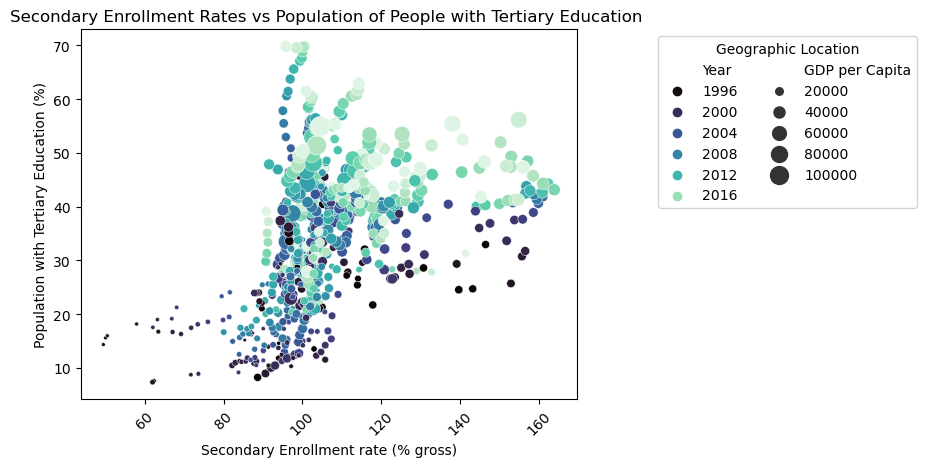

In [213]:
sns.scatterplot(data = combined_df, x = "Secondary Enrollment rate (% gross)", 
            y = "Population with Tertiary Education (%)", 
            hue = "Year", marker = "o", 
            palette = "mako", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Geographic Location");
plt.xticks(rotation = 45);
plt.title ("Secondary Enrollment Rates vs Population of People with Tertiary Education ");

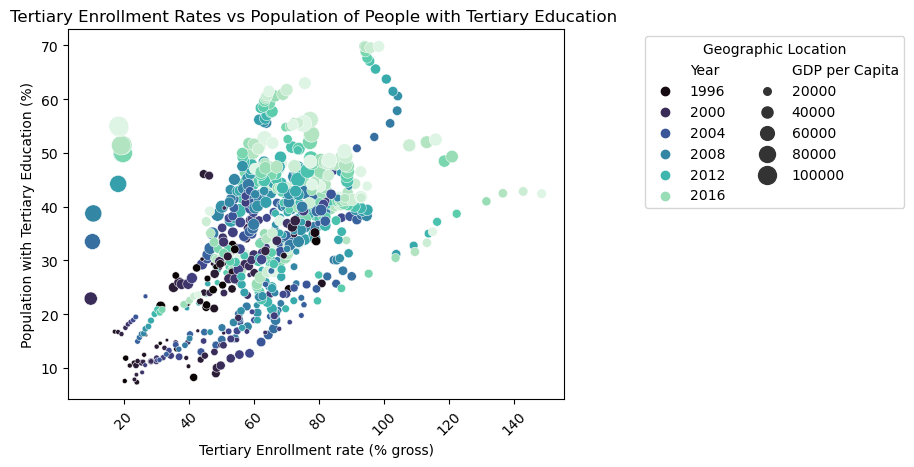

In [214]:
sns.scatterplot(data = combined_df, x = "Tertiary Enrollment rate (% gross)", 
            y = "Population with Tertiary Education (%)", 
            hue = "Year", marker = "o", 
            palette = "mako", size = "GDP per Capita", 
            sizes = (5, 200));
plt.legend(bbox_to_anchor = (1.7,1), 
           loc = 'upper right', ncol = 2,
          title = "Geographic Location");
plt.xticks(rotation = 45);
plt.title ("Tertiary Enrollment Rates vs Population of People with Tertiary Education ");

## Linear Regression Model and Statistics

In [215]:
X = combined_df[['Country', 'Year', 'GDP per Capita', 'Population(Million)', 
              'Average Spending on Higher Education (USD/student)', 'Government Expenditure On Education (%)',
              'Government Spending Teritary (% GDP)', 'Household Income per Capita', 'Number of Universities',
              'Primary Enrollment rate (% gross)', 'Secondary Enrollment rate (% gross)', 
              'Tertiary Enrollment rate (% gross)']]

y = combined_df[['Tertiary Enrollment rate (% gross)']].values

#Because the Linear Regression model only takes in numerical values, we had to create binary columns for each country.
X_binary = pd.get_dummies(X, columns=['Country']).values

#Since out X_binary matrix contains a lot of missing values (Nans), we need to replace those values with something else
#because a linear regression model does not accept any Nan.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_binary_imputed = imputer.fit_transform(X_binary)

#Since the y matrix also contains missing values (Nans), we need to replace those values with something else
y_imputed = imputer.fit_transform(y)


#Splitting data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_binary_imputed, y_imputed, test_size=0.3, random_state=2950)

#Creating a linear regression model on training data
model = LinearRegression().fit(X_train, y_train)


In [71]:
#Making predictions on testing data
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Calculate statistics
coefficients = model.coef_
intercept = model.intercept_[0].round()
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2 = r2_score(y_test, y_pred)

print("The coefficients are: " + str(coefficients))
print("The intercept is: " + str(intercept))
print("Mean Squared Error on Training Data: " + str(mse_train))
print("Mean Squared Error on Testing data: " + str(mse_test))
print("Root Mean Squared Error on Training Data: " + str(rmse_train))
print("Root Mean Squared Error on Testing Data: " + str(rmse_test))
print("R-squared: " + str(r2))

The coefficients are: [[-1.06828653e-15 -8.89045781e-18 -2.78522892e-15 -1.17853150e-17
  -2.76419906e-14  2.25005955e-14  7.94771267e-17 -1.99980628e-15
  -2.24349440e-16  9.77260618e-16  1.00000000e+00 -1.72671940e-15
  -1.71002081e-15 -2.43667873e-15 -2.62150416e-15  4.07968684e-15
   6.60134022e-17  2.93837902e-15 -6.16624198e-15 -3.37244061e-15
   6.36366012e-15  6.65683175e-15  4.33227870e-15 -4.89577820e-15
  -7.24949096e-16  3.14627988e-16 -4.63608055e-15  5.80317847e-15
  -3.37681211e-15 -5.58351494e-15 -2.98994808e-15 -2.15327087e-15
   4.34643646e-15  4.10416370e-15 -5.23350063e-15  2.95555047e-15
  -2.90567417e-15 -1.70096316e-15  2.16486647e-16 -6.06849672e-16
   6.95100792e-16 -1.31247528e-15  9.49565379e-16 -9.55839069e-18
   1.92094879e-15  3.46686911e-15 -6.91348942e-15 -2.37424831e-15
  -3.70758916e-15]]
The intercept is: 0.0
Mean Squared Error on Training Data: 1.4821217004272558e-24
Mean Squared Error on Testing data: 1.3108889615546942e-24
Root Mean Squared Error o

The MSE for our training model, is 1.4821217004272558e-24 and the MSE for our testing mode is 1.3108889615546942e-24. Both of these values are extremely small, almost close to zero, which indicates that the model's predictions are very close to the actual values. This indicates that our linear regression model is fitting the data well both on the training and the testing data. However, at the same time, this could also be an indication of overfitting, which means that model could also be too complex. 

The RMSE for the training data is 1.217424207261896e-12 and the RMSE for the testing data is 1.1449405930242382e-12. Because both these values are extremely small, almost close to zero, this indicated that the model's predictions are very close to the actual values. Also at the same time, since the training set's rmse value is slightly bigger than the testing set data, this could mean that the model is overfitting.

## Data Limitations

Our biggest issue when finding data was finding data that didn’t have a lot of missing values. A lot of the data that we did find, ended up having a lot of missing values in it. And since we cannot include Nan’s in our linear regression model we were forced to calculate the mean of the entire column and insert that in our missing entries. However, because of this, our Linear Regression model is not as accurate as it should have been. In the future, we will try to figure out a better method to fill in those data gaps instead of inserting the mean of the column. In addition, we had trouble finding long-range data. One of our really important data sets only has data from 1995-2020, and because of this, we had cut off the range of years to 1995 - 2020 even though all the other data sets had longer data ranges for the year. 

## Questions for TA

1. We have a lot of NAs because we had to find and merge different sets of data, but we don't think it will be as benefitical for our model if we shortened the time range to get rid of the NAs. One idea that we had was to find the NAs and manually input them using relevant data. For instance, for the Household Income per Capita